In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [92]:
import os
PATH  = os.path.dirname('intel-image-classification/')
PATH

'intel-image-classification'

In [93]:
train_dir = os.path.join(PATH ,'seg_train/seg_train')
val_dir = os.path.join(PATH ,'seg_test/seg_test')

In [94]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Data preparation

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1.0/255)
val_generator = ImageDataGenerator(rescale=1.0/255)

In [96]:
train_data_gen = train_generator.flow_from_directory(train_dir,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     batch_size=batch_size,classes=['building','forest','glacier','mountain','sea','street'])
val_data_gen = val_generator.flow_from_directory(val_dir,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     batch_size=batch_size,classes=['building','forest','glacier','mountain','sea','street'])


Found 11843 images belonging to 6 classes.
Found 2563 images belonging to 6 classes.


In [97]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

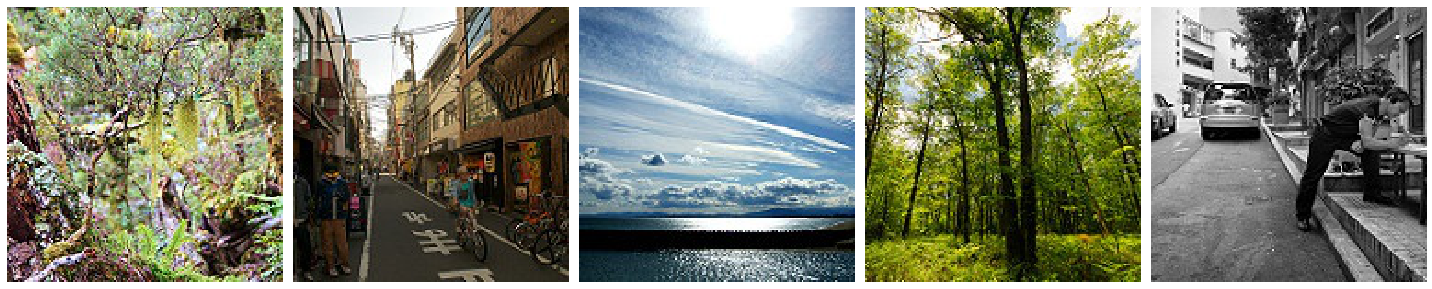

In [98]:
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [99]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential

model = Sequential(layers=[
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(128,(3,3),padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(.2),
    Dense(512,activation='relu',),
    Dense(6,activation='softmax')
])

In [100]:
model.compile(optimizer='RMSProp',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)            

In [102]:
r = model.fit(train_data_gen,steps_per_epoch=11843 // batch_size,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=2563 // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 185 steps, validate for 40 steps
Epoch 1/10
185/185 [==============================] - 195s 1s/step - loss: 1.8498 - accuracy: 0.1944 - val_loss: 1.8584 - val_accuracy: 0.1852
Epoch 2/10
185/185 [==============================] - 197s 1s/step - loss: 1.8529 - accuracy: 0.1917 - val_loss: 1.8584 - val_accuracy: 0.1852
Epoch 3/10
185/185 [==============================] - 196s 1s/step - loss: 1.8516 - accuracy: 0.1923 - val_loss: 1.8049 - val_accuracy: 0.2207
Epoch 4/10
185/185 [==============================] - 194s 1s/step - loss: 1.5947 - accuracy: 0.4413 - val_loss: 1.5340 - val_accuracy: 0.5059
Epoch 5/10
185/185 [==============================] - 195s 1s/step - loss: 1.3954 - accuracy: 0.6425 - val_loss: 1.3190 - val_accuracy: 0.7215
Epoch 6/10
185/185 [==============================] - 191s 1s/step - loss: 1.3213 - accuracy: 0.7181 - val_loss: 1.2691 - val_accuracy: 0.7699
Epoch 7/10
185/185 [=============================

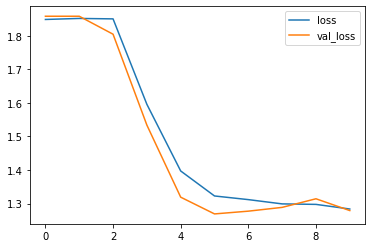

In [103]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

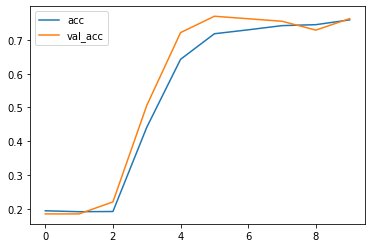

In [104]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()